### FrozenLake-v1
"The agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile."
https://gym.openai.com/envs/FrozenLake-v0/ 

The below is Frozen Lake set to slippery and random. 

In [29]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output
from gym.envs.toy_text.frozen_lake import generate_random_map

import matplotlib.pyplot as plt
import gc
gc.disable() #Disable automatic garbage collection.

In [30]:
env = gym.make('FrozenLake-v1', is_slippery=True)
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))
print("The dimensions of the q table are: ", q_table.shape)
print(q_table)

The dimensions of the q table are:  (16, 4)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [31]:
num_episodes = 20000
max_steps_per_episode = 100

learning_rate = 0.03 #0.03 #Between 0 and 1. How quickly the agent abandons the previous value in the Q table for the new value. 0: Agent learns nothing and only uses prior knowledge. 1: Agent considers only the most recent information.
discount_rate = 0.9 #0.97 Determines the importance of future rewards. 0 agent is short sighted and seees only current reqards. Appoaching 1, the agent strives for long term rewards.

exploration_rate = 1
max_exploration_rate = 1    #1: Guaranteed that agent starts the game by 100% exploring the environment
min_exploration_rate = 0    #0: Agent does not explore at all. Agent only exploits (chooses actions to get max points)
exploration_decay_rate = 0.001

*** AVG reward per 1000 episodes***

1000 :  0.18300000000000013
2000 :  0.20700000000000016
3000 :  0.2420000000000002
4000 :  0.23300000000000018
5000 :  0.2410000000000002
6000 :  0.21500000000000016
7000 :  0.22200000000000017
8000 :  0.23200000000000018
9000 :  0.2470000000000002
10000 :  0.2430000000000002
11000 :  0.2440000000000002
12000 :  0.2590000000000002
13000 :  0.2570000000000002
14000 :  0.22900000000000018
15000 :  0.2490000000000002
16000 :  0.2460000000000002
17000 :  0.2590000000000002
18000 :  0.25000000000000017
19000 :  0.2490000000000002
20000 :  0.23500000000000018


 *** Q-table ***

[[0.20381821 0.20665221 0.22005237 0.20237128]
 [0.21238955 0.22358168 0.2621277  0.22084586]
 [0.2269858  0.24121287 0.30620001 0.22309638]
 [0.2400204  0.33724484 0.24900456 0.20529897]
 [0.20691693 0.25809522 0.21634646 0.18986048]
 [0.23096052 0.26261834 0.30018896 0.2476812 ]
 [0.28559701 0.35969817 0.33259033 0.23481141]
 [0.33217253 0.44379294 0.37195499 0.26944272]
 [0.150

(0.0, 1.0)

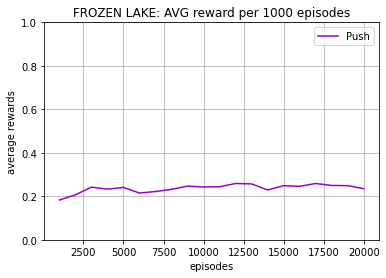

In [32]:
rewards_all_episodes = []

# Q-Learning algorithm
for episode in range(num_episodes):
    
    random_map = generate_random_map(size=4, p=0.8)
    env = gym.make('FrozenLake-v1', is_slippery=True, desc=random_map)
    state = env.reset()

    done = False
    rewards_current_episode = 0

    for step in range (max_steps_per_episode):

        # Exploration / Exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:])
        else:
            action = env.action_space.sample()
        
        new_state, reward, done, info = env.step(action)
        
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

        state = new_state
        rewards_current_episode += reward

        if done == True:
            break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)

    rewards_all_episodes.append(rewards_current_episode)

# Calculate reward across all episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_episodes / 1000)
count = 1000
count_plot = [] #for plotting
r_plot = [] #for plotting
print("*** AVG reward per 1000 episodes***\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count_plot.append(count) #for plotting. 
    r_plot.append(sum(r/1000)) #for plotting
    count += 1000


# Print Q table
print("\n\n *** Q-table ***\n")
print(q_table)


#Plot results 
%matplotlib inline
#Name x-axis, y-axis and whole graph
plt.xlabel("episodes")
plt.ylabel("average rewards")
plt.title("FROZEN LAKE: AVG reward per 1000 episodes")
# Plotting all the graphs
plt.plot(count_plot, r_plot, color="darkviolet", label = "Push")
plt.grid()
plt.legend()
#Load the display window
plt.show
#set y-axis limit
plt.ylim([0, 1])

In [33]:
random_map = generate_random_map(size=4, p=0.8)
env = gym.make('FrozenLake-v1', is_slippery=True, desc=random_map)
for episode in range(10): #number of episodes played through - up to 20,000
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(0.5) #changed from 1

    for step in range(max_steps_per_episode):        
        clear_output(wait=True)
        env.render()
        time.sleep(0.1) #changed from 0.3
        
        action = np.argmax(q_table[state,:])        
        new_state, reward, done, info = env.step(action)
        
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("****You reached the goal!****")
                time.sleep(0.5) #changed from 3
            else:
                print("****You fell through a hole!****")
                time.sleep(0.5) #changed from 3
            clear_output(wait=True)
            break
            
        state = new_state
        
env.close()

  (Down)
SFFF
HFFF
FFFF
FFFG
****You reached the goal!****
